Dataset shape: (1460, 11)

First 5 rows:
   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entrie

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5505 - loss: 0.6628 - val_accuracy: 0.7363 - val_loss: 0.5975
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8322 - loss: 0.5318 - val_accuracy: 0.8493 - val_loss: 0.4882
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8896 - loss: 0.4364 - val_accuracy: 0.8767 - val_loss: 0.3992
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8913 - loss: 0.3596 - val_accuracy: 0.8904 - val_loss: 0.3363
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.3093 - val_accuracy: 0.8904 - val_loss: 0.2956
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: 0.2798 - val_accuracy: 0.8904 - val_loss: 0.2747
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9041 - loss: 0.2617 - val_accuracy: 0.8938 - val_loss: 0.2610
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2506 - v

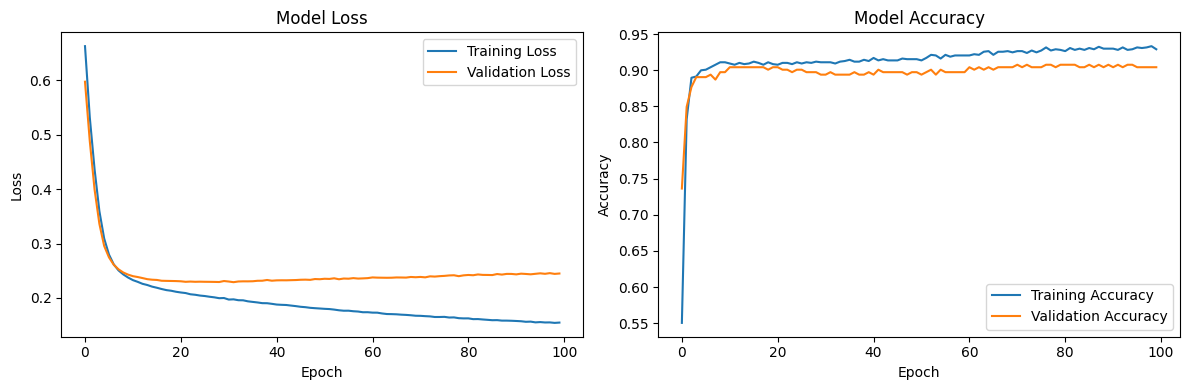

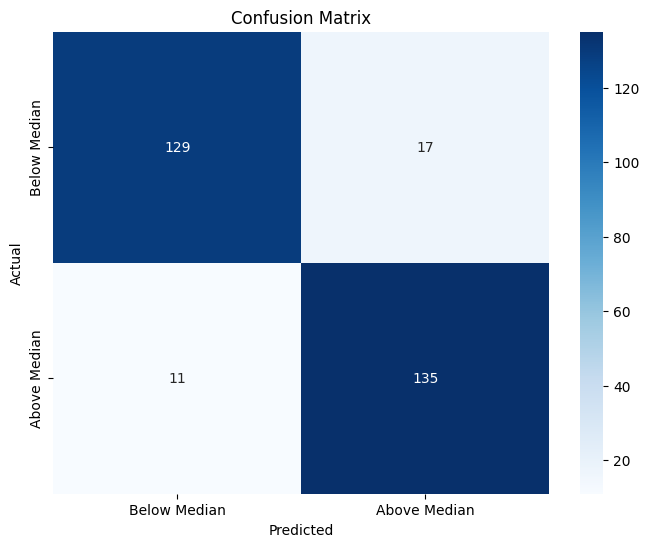


Prediction probabilities (first 10):
Sample 1: Probability = 0.0131, Prediction = 0, Actual = 0
Sample 2: Probability = 0.0453, Prediction = 0, Actual = 0
Sample 3: Probability = 0.1004, Prediction = 0, Actual = 0
Sample 4: Probability = 0.9951, Prediction = 1, Actual = 1
Sample 5: Probability = 0.9955, Prediction = 1, Actual = 1
Sample 6: Probability = 0.9233, Prediction = 1, Actual = 1
Sample 7: Probability = 0.0007, Prediction = 0, Actual = 0
Sample 8: Probability = 0.0784, Prediction = 0, Actual = 0
Sample 9: Probability = 0.9460, Prediction = 1, Actual = 1
Sample 10: Probability = 0.9762, Prediction = 1, Actual = 1

MODEL PERFORMANCE SUMMARY
Accuracy: 0.9041
Total Parameters: 321
Training Samples: 1,168
Test Samples: 292


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from keras.models import Sequential # sequential is a library that maps sequence of every layer
from keras.layers import Dense # if you import sequential, import dense, deals with layers, how many neurons are there
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("housing_data.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget variable distribution:")#we count how many samples are there in class distribution, counts of sample
print(df['AboveMedianPrice'].value_counts())

y = df.pop('AboveMedianPrice')#pop removes column from dataframe, whatever column we remove becomes target variable  
X = df # input variable, dataframe without abovemedianprice is input                        

print("\nMissing values:")
print(X.isnull().sum())#null values

X = X.fillna(X.mean())#fill null values with mean of that column

scaler = StandardScaler()#normalize feature, mean=0, sd=1 ( crucial for every neural network so that all features contribute equally )
X_scaled = scaler.fit_transform(X) # calculate scaling feature 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, # y=target variable
    test_size=0.2, 
    random_state=42, 
    stratify=y #maintains same class distribution, to maintain distribution of features ( features/target), it should be distributed in both sets 
)

print(f"\nTraining set size: {X_train.shape[0]}")#shape=2D array, 0= nows of rows
print(f"Testing set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}") #1=columns no

model = Sequential([ #model=variable
    Dense(units=16, input_dim=X_train.shape[1], #16 neurons(input layer), 
          kernel_initializer='glorot_uniform', activation='relu'),
    
    Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'),
    
    Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')# balance weight= glorot_uniform
])

print("\nModel Architecture:")
model.summary()#prints and gives model summary

model.compile(
    loss='binary_crossentropy',      
    optimizer='adam',                
    metrics=['accuracy']             
)

print("\nTraining the model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,#in first iteration, 32 samples at a time                    
    validation_data=(X_test, y_test), 
    verbose=1 # shows progress over the training session                       
)


print("\nMaking predictions...") 
y_pred_prob = model.predict(X_test) #probability prediction  
y_pred = (y_pred_prob > 0.5).astype(int)  


accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(f"\nPrediction probabilities (first 10):")
for i in range(10):
    print(f"Sample {i+1}: Probability = {y_pred_prob[i][0]:.4f}, "
          f"Prediction = {y_pred[i][0]}, Actual = {y_test.iloc[i]}")


print(f"\n{'='*50}")
print(f"MODEL PERFORMANCE SUMMARY")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Total Parameters: {model.count_params():,}")
print(f"Training Samples: {len(X_train):,}")
print(f"Test Samples: {len(X_test):,}")